# Atividade 4 - Laboratório de Estatística Aplicada

## Web Scraping no Mercado Livre

#### Vinícius Morgado Rosa Vianna - 791124

---

### Aplicação

In [32]:
# Carregando todos os pacotes necessários
import requests
from bs4 import BeautifulSoup
import time
import random
import json
import pathlib
import pandas as pd
import matplotlib.pyplot as plt

Inicialmente, identifiquei que os links das diferentes páginas seguem um padrão variando apenas um número, exceto a primeira que não contém esse número.

In [33]:
# Lista para armazenar as 10 páginas de anúncios
paginas = []
for i in range(1, 452, 50):
  # Captando a primeira página diferente das demais
  if len(paginas) == 0:
      paginas.append(f'https://lista.mercadolivre.com.br/celulares-telefones/celulares-smartphones/xiaomi/xiaomi-poco_NoIndex_True')
  # Captando as demais páginas conforme variação
  else:
      paginas.append(f'https://lista.mercadolivre.com.br/celulares-telefones/celulares-smartphones/xiaomi/xiaomi-poco_Desde_{i}_NoIndex_True')
print(f'Foram armazenadas {len(paginas)} páginas conforme essa:')
print(paginas[1])

Foram armazenadas 10 páginas conforme essa:
https://lista.mercadolivre.com.br/celulares-telefones/celulares-smartphones/xiaomi/xiaomi-poco_Desde_51_NoIndex_True


Como cada página armazenada contém diversos anúncios de celulares, agora vou extrair os links para acessar cada anúncio:

In [34]:
# Cabeçalho para simular um navegador
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36"
}

In [35]:
# Lista para salvar os links de todos os anúncios de todas as páginas
links = []
# Iterando sobre todas as páginas
for pagina in paginas:
    # Acessando a página
    response = requests.get(pagina, headers=headers)
    # Coletando o texto html da página
    soup = BeautifulSoup(response.text, "html.parser")
    # Acessando a tag que contém todos os anúncios da página
    anuncios = soup.find_all("li", class_="ui-search-layout__item shops__layout-item")
    # Iterando sobre todos os anúncios da página
    for i in range(len(anuncios)):
        # Extraindo cada link de cada anúncio
        link = [a['href'] for a in anuncios[i].find_all('a', href=True)]
        links.append(link[0])
    # Proteção anti-ban
    tempo_espera = random.uniform(0, 0.01) 
    time.sleep(tempo_espera)

In [36]:
print("Exemplo de link extraído: ")
print(links[0])

Exemplo de link extraído: 
https://click1.mercadolivre.com.br/mclics/clicks/external/MLB/count?a=Te%2FvRPnSTI1BoZP5uCE2VOIwkiqMjHoUsKdDmj4AN%2BhYchdB4GjZd%2B%2B9R6xsC%2FebApJPKS585k8xmn6wK4QgJQd5An1i2K8esu6TZ5MS0Zsq22BeZkaaZHtm%2BXnxaZQqRf0Fc10pmXaxbnyUZK74zY3tdB8IJ6afts8MPcXt1OynYwhputS%2BpB1f4JjdIrVTw86hMdViyX%2FAiiE9HegHhnQ3rbooVxXNw4P2aVAJganJCQ%2Fe3PTPkjg33%2FBfCl4em6XvkBsvsLvF6cLBC8Hon2%2FcD4MgLjpHsvgCz3ALbj%2BXH0R3uv7AnpIOnVe94OiPTs8ULfxY0yO%2FUILyPYLo6GxHvjo1mzRb93KtlpkNV8sA4eaczZMoi1BovJWnHSQVcEvvm6I2nGH%2FZSyntTFJLikHChT8535DXh%2B50uXY7lVKcEQiczSWrTBAcW4jvxsSj6I08HhMGlvqqCZ09n2oAezBmLjuVfNC63u3ylaf4J3yfolNdSv3A6bVMf7Rdpn3qlZbAfVwCWFIs%2FakZTs4wydFDJ7U1PIL1jTNIVD64To2NDOMUpty%2F6jTG68wPXfiDsNGslEbr2MWyTvmllHF39rIGat13PrlRoBMYiknlzdnhPxv%2BmnwvjKLhOSbr0%2BuV4b68SxdobithcC%2F0j5dkr8U8%2F%2FwMZV4eCEd7L6jL1yK2TwJrqouu4jRX5lO4Ks7ib%2B6qNtwbn3K76gydq3Ie5g6vtP29UGbc5xfZKzmtsK7%2Btg%2BUQfooVADloaMc96lxP5clU2RSyU9UWsUCnzPnb8VXEScUg%3D%3D&rb=x#polycard_client=search-nordic&tracking_id=d

Extraídos os links dos anúncios, agora vou extrair algumas informações úteis de cada link e criar um dataset com todas essas informações extraídas:

In [37]:
# Diretório onde os arquivos serão salvos
data_dir = pathlib.Path("data")
data_dir.mkdir(exist_ok=True) 

# Contador para os aparelhos
cont = 0

# Iterando por todos os anúncios coletados
for link in links:
    # Acessando o link
    response = requests.get(link, headers=headers)
    # Armazenando o texto do html do site
    soup = BeautifulSoup(response.text, "html.parser")
    # Extraindo o título do anúncio
    titulo = soup.find("h1", class_="ui-pdp-title").get_text(strip=True)
    # Extraindo o preço do anúncio
    preco = soup.find("span", class_="andes-money-amount__fraction").get_text(strip=True)
    # Acessando a tag que contém as avaliações e rating
    span_rating = soup.find("div", class_="ui-pdp-header__info")
    # Verificando se o anúncio tem pelo menos uma avaliação
    if span_rating:
        # Extraindo o rating do anúncio
        rating = soup.find("span", class_="ui-pdp-review__rating").get_text(strip=True)
        # Extraindo a quantidade de avaliações do anúncio
        avaliacoes = soup.find("span", class_="ui-pdp-review__amount").get_text(strip=True)
    # Caso contrário, definindo rating e avaliações para 0
    else:
        rating = 0
        avaliacoes = 0
    # Armazenando as informações extraídas em um dicionário
    informacoes = {
        "Link": link,
        "Titulo": titulo,
        "Preco": preco,
        "Rating": rating,
        "Avaliacoes": avaliacoes
    }
    # Incrementando o contador de anúncios
    cont +=1
    # Definindo o nome do arquivo JSON a ser armazenado no dataset
    filename = f"Produto_{cont}.json"
    # Definindo o diretório em que o arquivo JSON será armazenado
    file_path = data_dir / filename
    # Armazenando o arquivo JSON
    with file_path.open("w", encoding="utf-8") as f:
        json.dump(informacoes, f, ensure_ascii=False, indent=4)
    # Mostrando o nome do arquivo armazenado
    print(f"Arquivo salvo: {file_path}")
    # Proteção anti-ban
    tempo_espera = random.uniform(0, 0.5)
    time.sleep(tempo_espera)

Arquivo salvo: data\Produto_1.json
Arquivo salvo: data\Produto_2.json
Arquivo salvo: data\Produto_3.json
Arquivo salvo: data\Produto_4.json
Arquivo salvo: data\Produto_5.json
Arquivo salvo: data\Produto_6.json
Arquivo salvo: data\Produto_7.json
Arquivo salvo: data\Produto_8.json
Arquivo salvo: data\Produto_9.json
Arquivo salvo: data\Produto_10.json
Arquivo salvo: data\Produto_11.json
Arquivo salvo: data\Produto_12.json
Arquivo salvo: data\Produto_13.json
Arquivo salvo: data\Produto_14.json
Arquivo salvo: data\Produto_15.json
Arquivo salvo: data\Produto_16.json
Arquivo salvo: data\Produto_17.json
Arquivo salvo: data\Produto_18.json
Arquivo salvo: data\Produto_19.json
Arquivo salvo: data\Produto_20.json
Arquivo salvo: data\Produto_21.json
Arquivo salvo: data\Produto_22.json
Arquivo salvo: data\Produto_23.json
Arquivo salvo: data\Produto_24.json
Arquivo salvo: data\Produto_25.json
Arquivo salvo: data\Produto_26.json
Arquivo salvo: data\Produto_27.json
Arquivo salvo: data\Produto_28.json
A

Criado o dataset com todos os produtos e suas respectivas informações, vou agora fazer um filtro mais otimizado em relação ao filtro do Mercado Livre, pois, mesmo pesquisando "Xiaomi Poco", ainda assim são recomendados celulares da Xiaomi que não são da linha Poco. Além disso, vou filtrar apenas os celulares que contém pelo menos uma avaliação.

In [38]:
# Caminho da pasta com os arquivos JSON
data_dir = pathlib.Path("data")
# Lista para armazenar apenas os celulares que têm "Poco" no título
celulares_poco = []
# Abrindo e processando os arquivos JSON
for json_file in data_dir.rglob("*.json"):
    with json_file.open("r", encoding="utf-8") as f:
        data = json.load(f)
        # Pegando o título de cada arquivo
        titulo = data.get("Titulo", "")
        # Pegando a quantidade de avaliações de cada arquivo
        avaliacoes = data.get("Avaliacoes", "")
        # Filtrando aparelhos com "Poco" no título e com pelo menos uma avaliação
        if "poco" in titulo.lower() and avaliacoes != 0:~
            celulares_poco.append(data)
# Mostrando quantos aparelhos restaram após a filtragem
print(f"Foram encontrados {len(celulares_poco)} anúncios com 'Poco' no título e com pelo menos uma avaliação.")

Foram encontrados 222 anúncios com 'Poco' no título e com pelo menos uma avaliação.


Feito esse filtro inicial, agora vou construir histogramas para o preço e para a quantidade de avaliações.

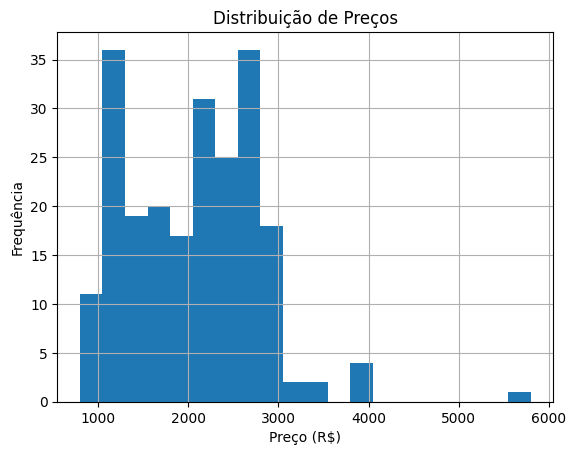

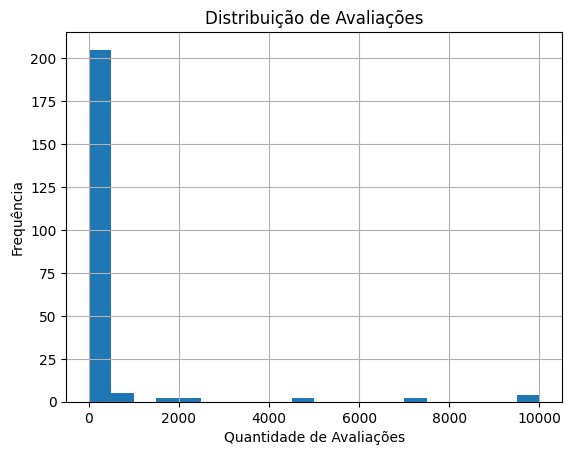

In [39]:
# Criando um dataframe com os aparelhos filtrados
df = pd.DataFrame(celulares_poco)
# Tratando as variáveis necessárias
df["Preco"] = df["Preco"].str.replace(".", "").astype(int)
df["Rating"] = df["Rating"].astype(float)
df["Avaliacoes"] = df["Avaliacoes"].str.strip("()").astype(int)
# Histograma para a distribuição do preço
df["Preco"].hist(bins=20)
plt.title("Distribuição de Preços")
plt.xlabel("Preço (R$)")
plt.ylabel("Frequência")
plt.show()
# Histograma para a distribuição da quantidade de avaliações
df["Avaliacoes"].hist(bins=20)
plt.title("Distribuição de Avaliações")
plt.xlabel("Quantidade de Avaliações")
plt.ylabel("Frequência")
plt.show()

Com base nos histogramas, é notório que a quantidade de avaliações é altamente concentrada em valores pequenos (abaixo de 2000 avaliações). Além disso, a distribuição dos preços é concentrada entre R$1000 e R$3000, com um destaque para muitos aparelhos em torno de R$1200. 

Assim, após os indicativos dessa pequena análise descritiva somados à minha preferência em relação ao preço e quantidade de avaliações, faremos um novo filtro: aparelhos com mais de 2000 avaliações e entre R$2000 e R$3000.

In [48]:
# Criando um novo dataframe com um novo filtro
df_filtrado = df[
    (df["Avaliacoes"] > 2000) &
    (df["Preco"] >= 2000) &
    (df["Preco"] <= 3000)
]
# Mostrando os aparelhos restantes após filtragem
print(df_filtrado)

                                                                                                                                                                                                                                                                                                     Link  \
37   https://www.mercadolivre.com.br/xiaomi-pocophone-poco-x6-pro-5g-dual-sim-512-gb-amarelo-12-gb-ram/p/MLB29734179#polycard_client=search-nordic&wid=MLB3871482087&sid=search&searchVariation=MLB29734179&position=12&search_layout=stack&type=product&tracking_id=d8eab04b-366e-429d-97b4-7281cb5adfc1   
91         https://www.mercadolivre.com.br/xiaomi-pocophone-poco-x6-5g-dual-sim-512-gb-preto-12-gb-ram/p/MLB29734536#polycard_client=search-nordic&wid=MLB3908524179&sid=search&searchVariation=MLB29734536&position=20&search_layout=stack&type=product&tracking_id=d8eab04b-366e-429d-97b4-7281cb5adfc1   
127                https://www.mercadolivre.com.br/xiaomi-poco-x6-pro-5g-dual-sim-256-gb-preto-8-

Após esse último filtro, chegamos em apenas 3 aparelhos. Com isso, o próximo passo seria filtrar pelo maior rating, porém como temos poucas unidades isso é feito de forma direta. 

Assim, cheguei em 2 aparelhos e, acessando o link para ver mais especificações de cada um, consegui chegar a uma conclusão de qual aparelho comprar:

In [63]:
# Selecionando as informações do aparelho escolhido
meu_celular_novo = df_filtrado.iloc[0]

# Printando as informações do meu celular novo :)
print("Meu celular novo é: ")
print(f"Marca/Modelo: {meu_celular_novo["Titulo"]}")
print(f"Preço: R${meu_celular_novo["Preco"]}")
print()
print(f"O anúncio contém {meu_celular_novo["Avaliacoes"]} avaliações com {meu_celular_novo["Rating"]}/5 de rating.")
print()
print("Para mais informações e especificações: ")
print(f"Anúncio: {meu_celular_novo["Link"]}")

Meu celular novo é: 
Marca/Modelo: Xiaomi Pocophone Poco X6 Pro 5G Dual SIM 512 GB Amarelo 12 GB RAM
Preço: R$2498

O anúncio contém 7155 avaliações com 4.8/5 de rating.

Para mais informações e especificações: 
Anúncio: https://www.mercadolivre.com.br/xiaomi-pocophone-poco-x6-pro-5g-dual-sim-512-gb-amarelo-12-gb-ram/p/MLB29734179#polycard_client=search-nordic&wid=MLB3871482087&sid=search&searchVariation=MLB29734179&position=12&search_layout=stack&type=product&tracking_id=d8eab04b-366e-429d-97b4-7281cb5adfc1


--- 

Curiosidade: Eu realmente comprei esse celular recentemente e ele vai chegar no começo do ano que vem kkkkkk